## TITANIC SURVIVAL DATASET PREDICTION

### Step 1: Import all standard library

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step 2: Load Dataset

In [28]:
data = pd.read_csv('tested.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
data.shape

(418, 12)

#### Observations:
- Survived is the target variable

### Step 3: Data Cleaning and Data Preprocessing

In [30]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- Drop unecessary column
- cabin column has more than 70% null value, so drop column from dataset

In [31]:
data = data.drop('Cabin', axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [32]:
data=data.drop(['Name','PassengerId','Ticket'],axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


- Missing value treatment

In [33]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
si

SimpleImputer(strategy='median')

In [34]:
data['Age'] = si.fit_transform(data[['Age']])
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [35]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'mean')
si

SimpleImputer()

In [36]:
data['Fare'] = si.fit_transform(data[['Fare']])
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

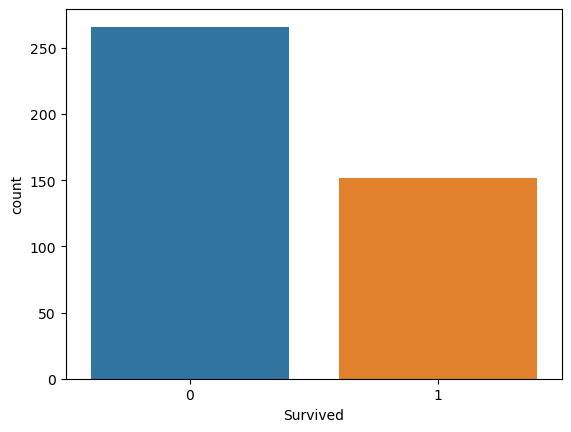

In [37]:
sns.countplot(x=data['Survived'])
plt.show()

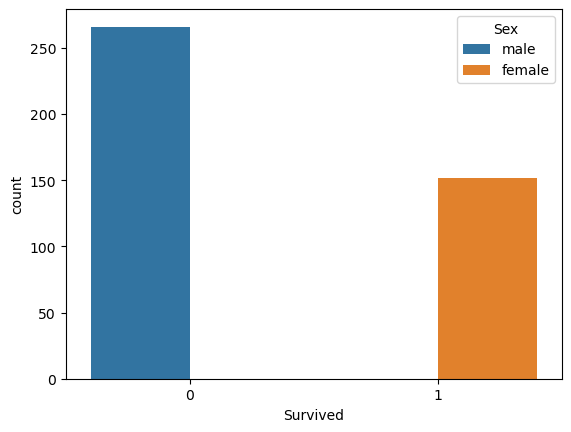

In [38]:
sns.countplot(x=data['Survived'],hue=data['Sex'])
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

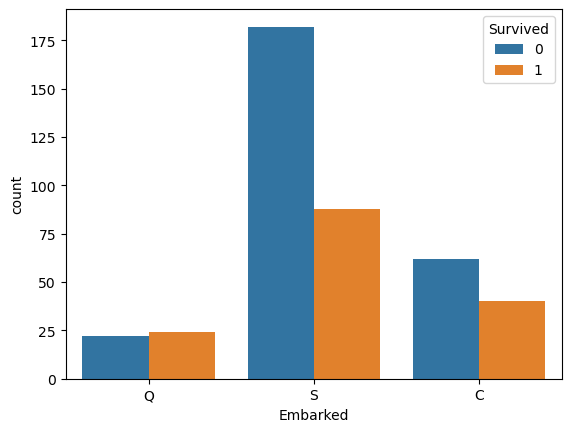

In [39]:
sns.countplot(x=data['Embarked'], hue= data['Survived'])

<AxesSubplot:>

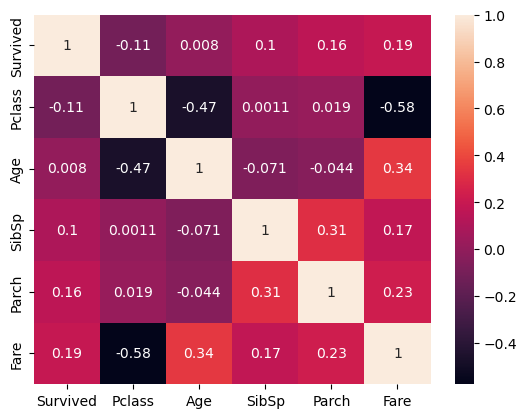

In [40]:
sns.heatmap(data.corr(),annot=True) 

### Feature Scaling

- apply feature scaling on numerical column

In [41]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss

StandardScaler()

In [42]:
data[['Age','Fare']]= ss.fit_transform(data[['Age','Fare']])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,0.386231,0,0,-0.498407,Q
1,1,3,female,1.371370,1,0,-0.513274,S
2,0,2,male,2.553537,0,0,-0.465088,Q
3,0,3,male,-0.204852,0,0,-0.483466,S
4,1,3,female,-0.598908,1,1,-0.418471,S


### Feature Encoding

- apply one hot feature encoding on Sex and Embarked column

In [43]:
dic1 = {'male':0,'female':1}
dic1

{'male': 0, 'female': 1}

In [44]:
data['Sex']= data['Sex'].replace(dic1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,0.386231,0,0,-0.498407,Q
1,1,3,1,1.371370,1,0,-0.513274,S
2,0,2,0,2.553537,0,0,-0.465088,Q
3,0,3,0,-0.204852,0,0,-0.483466,S
4,1,3,1,-0.598908,1,1,-0.418471,S


In [45]:
data_ohe = pd.get_dummies(data['Embarked'])
data_ohe.head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [46]:
data = pd.concat([data,data_ohe], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,0,0.386231,0,0,-0.498407,Q,0,1,0
1,1,3,1,1.371370,1,0,-0.513274,S,0,0,1
2,0,2,0,2.553537,0,0,-0.465088,Q,0,1,0
3,0,3,0,-0.204852,0,0,-0.483466,S,0,0,1
4,1,3,1,-0.598908,1,1,-0.418471,S,0,0,1


In [47]:
data= data.drop('Embarked', axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,0,0.386231,0,0,-0.498407,0,1,0
1,1,3,1,1.371370,1,0,-0.513274,0,0,1
2,0,2,0,2.553537,0,0,-0.465088,0,1,0
3,0,3,0,-0.204852,0,0,-0.483466,0,0,1
4,1,3,1,-0.598908,1,1,-0.418471,0,0,1


### Step 4: Separate X and Y 

In [49]:
x= data.drop('Survived', axis=1)
y= data['Survived']

### Step 5:  Split dataset into train and test 

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

#### Apply Decision Tree Classifier algorithm on dataset

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [71]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

### Step 6: Prediction

In [72]:
y_pred_dtc = dtc.predict(x_test)
y_pred_dtc

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

### Step 7: Evaluations

In [73]:
from sklearn.metrics import accuracy_score
accuracy_dtc = accuracy_score(y_test,y_pred_dtc)
accuracy_dtc

1.0

#### Apply Logistic Regression algorithm on Dataset

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [52]:
lr.fit(x_train,y_train)

LogisticRegression()

In [54]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test)
accuracy

1.0

## Obervation: 
    - Using Logistic Regression and Decission Tree Classification algorithm we get 100% accuracy 
    - So, both algorithm's best fit on Titanic Dataset.

In [57]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,x,y,cv=10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])